# Exploit vs. Exploration


In [2]:
import gym
import numpy as np

try:
    gym.make('FrozenLake-v3')
except:
    gym.envs.registration.register(
        id='FrozenLake-v3',
        entry_point='gym.envs.toy_text:FrozenLakeEnv',
        kwargs={
            'map_name': '4x4',
            'is_slippery': False # This option is mandatory for dummy algorithm
        }
    )

In [22]:
env = gym.make('FrozenLake-v3')


Q = np.zeros((env.observation_space.n, env.action_space.n))
num_episodes = 2000

discount = 0.99

total_rewards = []
for i in range(num_episodes):
    state = env.reset()
    done = False
    sum_rewards = 0
    while not done:
        action = np.argmax(Q[state,:] + np.random.randn(env.action_space.n) / (i+1))
        new_state, reward, done, info = env.step(action)    
        Q[state,action] = reward + discount * np.max(Q[new_state, :])
        sum_rewards += reward
        state = new_state
    else:
        total_rewards.append(sum_rewards)

In [24]:
print(sum(total_rewards) / num_episodes)
print(Q)

0.972
[[0.         0.         0.95099005 0.        ]
 [0.         0.         0.96059601 0.        ]
 [0.         0.970299   0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         1.         0.        ]
 [0.         0.         0.         0.        ]]


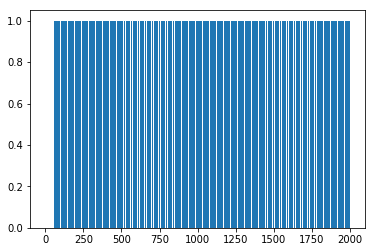

In [25]:
import matplotlib.pyplot as plt
plt.bar(list(range(len(total_rewards))), total_rewards)
plt.show()